<a href="https://colab.research.google.com/github/RellyRell/US-Real-Estate-Data/blob/main/RealEstateDatabaseColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

24-07-22
You can now embed Google sheets directly into Colab to streamline interactions with data with InteractiveSheet.

Example:

from google.colab import sheets
sh = sheets.InteractiveSheet()
df = sh.as_df()

In [ ]:
#Comment out if not in google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#change directory. Comment out if not in google colab
%cd /content/gdrive/MyDrive/'Colab Notebooks'

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
#retrieve dataset from kaggle
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
User cancelled operation
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 63, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1586, in dataset_download_cli
    self.dataset_download_files(dataset,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1502, in dataset_download_files
    self.datasets_download_with_http_info(
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api.py", line 1555, in datasets_download_with_http_info
    return self.api_client.call_api(
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api_client.py", line 313, in call_api
    return self.__call_api(resource_path, method,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api_client.py", line 145, in __call_

In [ ]:
'''Unzip file in google colab folder can specify folder by using
 !unzip filename -d directory path'''
! unzip usa-real-estate-dataset.zip -d /content/gdrive/MyDrive/'Colab Notebooks'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("realtor-data.zip.csv")

In [ ]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [ ]:
#Suming total of null values per column.
df.isnull().sum()

,0
brokered_by,4533
status,0
price,1541
bed,481317
bath,511771
acre_lot,325589
street,10866
city,1407
state,8
zip_code,299


In [ ]:
#Create a copy of the df for editing
df_f=df.copy()

In [ ]:
#Checking to ensure data copied correctly
df_f.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
'''#In case user input is wanted
state_select = input("Which state would you like to analyze: ")
# otherwise manually set state for analysis
# state_select = state_name'''

'#In case user input is wanted\nstate_select = input("Which state would you like to analyze: ")\n# otherwise manually set state for analysis\n# state_select = state_name'

In [ ]:
'''
states = df_filter['state'].unique() |
Can create a list variable for the while loop to test against or dataframe directly
'''

#In case user input is wanted
#''' Comment out if manually inputting state
state_select = input("Which state would you like to analyze: (Please enter the full state name) ")

while state_select not in df_f['state'].unique():
  print("The state you selected is invalid. Please check spelling or capitalizations and try again.")
  state_select = input("Which state would you like to analyze: ")
else:
  pass
#'''
# otherwise manually set state for analysis
# state_select = state_name

Which state would you like to analyze: (Please enter the full state name) Florida


In [ ]:
#verify input was captured
print(state_select)

Florida


In [ ]:
#Checking how much data is available for top 10 states with most data
df_f['state'].value_counts().head(10)

,count
state,
Florida,249432
California,227215
Texas,208335
New York,103159
North Carolina,85745
Illinois,85280
Georgia,80977
Pennsylvania,78373
Arizona,72825


In [ ]:
#consider cleaning data before filtering for specific state
#Creating a filtered dataframe
df_f2=df_f[df_f['state']==state_select]

In [ ]:
df_f2.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
303557,106182.0,for_sale,1500000.0,NaN,NaN,16.50,1956025.0,Malabar,Florida,32950.0,NaN,NaN
350960,26542.0,for_sale,436000.0,NaN,NaN,4.73,733046.0,NaN,Florida,99999.0,NaN,NaN
354796,70271.0,for_sale,349000.0,NaN,NaN,1.33,1894417.0,Palm Bay,Florida,32905.0,NaN,NaN
360451,3307.0,for_sale,100000.0,NaN,NaN,NaN,1273088.0,Out of State,Florida,NaN,NaN,NaN
409454,22505.0,for_sale,52000.0,NaN,NaN,NaN,1507075.0,Out of State,Florida,NaN,NaN,NaN


In [ ]:
#Verify only selected state is actice
df_f2['state'].value_counts()

,count
state,
Florida,249432


In [ ]:
df_f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249432 entries, 303557 to 1759371
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     247514 non-null  float64
 1   status          249432 non-null  object 
 2   price           249418 non-null  float64
 3   bed             188893 non-null  float64
 4   bath            187234 non-null  float64
 5   acre_lot        186507 non-null  float64
 6   street          246475 non-null  float64
 7   city            249058 non-null  object 
 8   state           249432 non-null  object 
 9   zip_code        249409 non-null  float64
 10  house_size      188287 non-null  float64
 11  prev_sold_date  193412 non-null  object 
dtypes: float64(8), object(4)
memory usage: 24.7+ MB


In [ ]:
df_f2['price'].isnull().sum()

14

In [ ]:
#df.isnull().sum() sum of all null values in a df
#dropping all null values prior to analysis. Nulls will not provide an accurate assesment of the data depending on the data we want analysis
#df_filter.dropna(inplace=True)
#drop duplicated values
df_f2.drop_duplicates(inplace=True)
df_f2.dropna(subset=['price'],inplace=True) #subset used to identify which columns to drop null valeus from
df_f2.isnull().sum()

<ipython-input-182-b66cd5b64c3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f2.drop_duplicates(inplace=True)
<ipython-input-182-b66cd5b64c3f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f2.dropna(subset=['price'],inplace=True) #subset used to identify which columns to drop null valeus from


,0
brokered_by,1918
status,0
price,0
bed,60537
bath,62185
acre_lot,62913
street,2957
city,374
state,0
zip_code,23


In [ ]:
df_f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249418 entries, 303557 to 1759371
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     247500 non-null  float64
 1   status          249418 non-null  object 
 2   price           249418 non-null  float64
 3   bed             188881 non-null  float64
 4   bath            187233 non-null  float64
 5   acre_lot        186505 non-null  float64
 6   street          246461 non-null  float64
 7   city            249044 non-null  object 
 8   state           249418 non-null  object 
 9   zip_code        249395 non-null  float64
 10  house_size      188275 non-null  float64
 11  prev_sold_date  193410 non-null  object 
dtypes: float64(8), object(4)
memory usage: 24.7+ MB


In [ ]:
df_f2.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
303557,106182.0,for_sale,1500000.0,NaN,NaN,16.50,1956025.0,Malabar,Florida,32950.0,NaN,NaN
350960,26542.0,for_sale,436000.0,NaN,NaN,4.73,733046.0,NaN,Florida,99999.0,NaN,NaN
354796,70271.0,for_sale,349000.0,NaN,NaN,1.33,1894417.0,Palm Bay,Florida,32905.0,NaN,NaN
360451,3307.0,for_sale,100000.0,NaN,NaN,NaN,1273088.0,Out of State,Florida,NaN,NaN,NaN
409454,22505.0,for_sale,52000.0,NaN,NaN,NaN,1507075.0,Out of State,Florida,NaN,NaN,NaN


In [ ]:
#Dropping street and brokered by column. It is encoded and not going to provide helpful insight to the questions we want to answer
# default axis is 0 which are the rows. Test without inplace first to ensure changes are accurate
df_f2.drop(['street','brokered_by'], axis=1, inplace=True)

<ipython-input-183-4dd6739fe248>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f2.drop(['street','brokered_by'], axis=1, inplace=True)


In [ ]:
df_f2.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
303557,for_sale,1500000.0,NaN,NaN,16.50,Malabar,Florida,32950.0,NaN,NaN
350960,for_sale,436000.0,NaN,NaN,4.73,NaN,Florida,99999.0,NaN,NaN
354796,for_sale,349000.0,NaN,NaN,1.33,Palm Bay,Florida,32905.0,NaN,NaN
360451,for_sale,100000.0,NaN,NaN,NaN,Out of State,Florida,NaN,NaN,NaN
409454,for_sale,52000.0,NaN,NaN,NaN,Out of State,Florida,NaN,NaN,NaN


##**Questions we will be answering the following questions for our selected state**

***

1.   Average home sale price per city in selected state
2.   Most popular bed bath in selected state w/ graphical display
3.   What year had the highest value of home sales w/ graphical display for selected state
4.   What state sold the highest number of homes
5.  What state has the highest number of active listings

***




###**Question 1: Average home sale price per city in selected state. Top 10 cities with the highest avgs in graphical format**

In [ ]:
df_f2['status'].value_counts()

,count
status,
for_sale,161213
sold,85592
ready_to_build,2613


In [ ]:
#Filtering by sold homes. Active/Pending homes cannot be used for avg 'sale' price
q1=df_f2[df_f2['status']=='sold']
q1.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
1660423,sold,434000.0,2.0,3.0,NaN,Fernandina Beach,Florida,32034.0,1150.0,2021-11-18
1660521,sold,425000.0,4.0,2.0,NaN,Fernandina Beach,Florida,32034.0,2146.0,2021-12-01
1660522,sold,128500.0,NaN,NaN,0.26,Yulee,Florida,32097.0,NaN,2021-12-01
1660526,sold,659900.0,3.0,3.0,NaN,Fernandina Beach,Florida,32034.0,2579.0,2021-12-01
1660530,sold,849000.0,4.0,5.0,NaN,Fernandina Beach,Florida,32034.0,3974.0,2021-12-06


In [ ]:
#grouping by city then finding average sale price per city
#reset_index keeps it in a dataframe otherwise it will become a series
statsq1=q1.groupby('city')['price'].mean().reset_index()#.transpose()

In [ ]:
statsq1

,city,price
0,15th Ave Milton,17000.000000
1,Access Undetermined,40500.000000
2,Alachua,328350.191011
3,Alford,146260.000000
4,Altamonte Springs,250806.131868
...,...,...
593,Youngstown,90400.000000
594,Yulee,331010.155556
595,Zellwood,173487.375000
596,Zephyrhills,178540.783688


In [ ]:
#Updating/rename column header to add more detail and rounding to two decimals. Must be dataframe to use this method
statsq1.rename({'price':'Average_Sale_Price'}, axis=1, inplace=True)
statsq1= statsq1.round(2)
statsq1.head()

,city,Average_Sale_Price
0,15th Ave Milton,17000.00
1,Access Undetermined,40500.00
2,Alachua,328350.19
3,Alford,146260.00
4,Altamonte Springs,250806.13


In [ ]:
#alternative method to find the mean using the describe function. Comment out and execute line by line to see changes.
test=q1.groupby('city')['price'].describe().reset_index()
test=test[['city','mean']] # pulling just the mean and city name into a separate table
test['mean']=test['mean'].round(2)
test.columns.values[1] = 'Average_Sale_Price' #column names need to match in order to compare.
test.equals(statsq1) # Comapring the two results to see if they match



True

In [ ]:
statsq1_top=statsq1.sort_values(by=['Average_Sale_Price'],ascending=False).head(10)
statsq1_top
#statsq1['Average_Sale_Price'].sort_values(ascending=False).head(10)

,city,Average_Sale_Price
43,Belleair Shores,8500000.00
164,Fisher Island,7325000.00
50,Boca Grande,4453400.00
417,Palm Beach,4381688.89
321,Manalapan,3363333.33
219,Highland Beach,3165408.95
190,Golden Beach,2925000.00
10,Anna Maria,2584837.50
264,Key Biscayne,2548752.67
529,Surfside,2186320.93


<Axes: ylabel='city'>

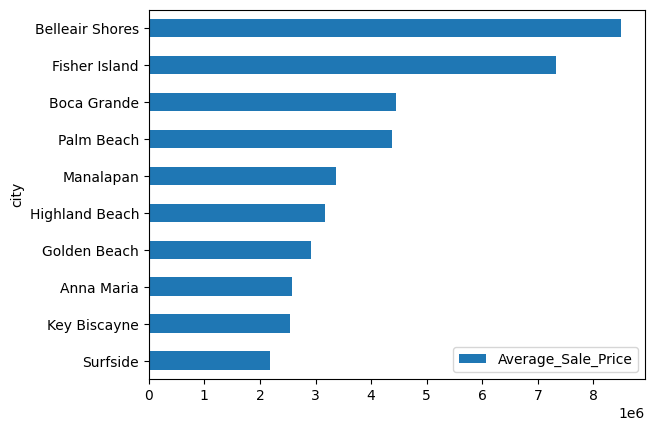

In [ ]:
statsq1_top.sort_values(by=['Average_Sale_Price'],ascending=True).plot(kind='barh', y='Average_Sale_Price', x='city') # Chart defaulted to smallest to largest, needed to resort

###**Question 2: Most popular bed bath combination in selected state**

In [ ]:
#dropping all null values for bed and bath
q2_f=df_f2.copy()
print(q2_f.isnull().sum())
q2_f.dropna(subset=['bed','bath'],inplace=True)
print(q2_f.isnull().sum())

status                0
price                 0
bed               60537
bath              62185
acre_lot          62913
city                374
state                 0
zip_code             23
house_size        61143
prev_sold_date    56008
dtype: int64
status                0
price                 0
bed                   0
bath                  0
acre_lot          57812
city                 43
state                 0
zip_code             11
house_size         2778
prev_sold_date    33033
dtype: int64


In [ ]:
q2 = q2_f.groupby('state')[['bed','bath']].value_counts().reset_index().head()
q2

,state,bed,bath,count
0,Florida,3.0,2.0,50426
1,Florida,2.0,2.0,36076
2,Florida,3.0,3.0,17415
3,Florida,4.0,3.0,15489
4,Florida,4.0,2.0,14644


In [ ]:
#Adding the values for bed and bath to a new column for graphing
#Created a blank list to capture the values for bed and bath that will be used in the for loop
#.itertuples(): Faster, access by attribute
#.iterrows(): Slower, retains index access
bed_bath=[]
for index, row in q2.iterrows(): #iterrows pulls the index and value from a row in a df
  bed_bath.append("{}/{}".format(row['bed'],row['bath']))
#print(bed_bath) #Confirm correct values are captured in list

q2['bed/bath'] = pd.DataFrame(bed_bath)
q2

,state,bed,bath,count,bed/bath
0,Florida,3.0,2.0,50426,3.0/2.0
1,Florida,2.0,2.0,36076,2.0/2.0
2,Florida,3.0,3.0,17415,3.0/3.0
3,Florida,4.0,3.0,15489,4.0/3.0
4,Florida,4.0,2.0,14644,4.0/2.0


In [ ]:
#Same as above with a faster function
bed_bath= []
for row in q2.itertuples():
  bed_bath.append(f"{row.bed}/{row.bath}")

q2['bed/bath'] = pd.DataFrame(bed_bath)
q2

,state,bed,bath,count,bed/bath
0,Florida,3.0,2.0,50426,3.0/2.0
1,Florida,2.0,2.0,36076,2.0/2.0
2,Florida,3.0,3.0,17415,3.0/3.0
3,Florida,4.0,3.0,15489,4.0/3.0
4,Florida,4.0,2.0,14644,4.0/2.0


In [ ]:
#Long way of performing above code. Inital method tested, but wanted to simply using loops
''' in order to capture the correct bed bath of the top 5 i indexed the corresponding column and rows
.join combines two strs together and map changes the int (from the indexing) to a str
'''
'''
import matplotlib.pyplot as plt
q2_top=q2.head()
#q2_f= q2_top.rename(index={0:[q2_top['bed'][0],q2_top['bath'][0]],1:'4/3',2:'3/3',3:'4/2',4:'4/4'}).reset_index()
q2_f= q2_top.rename(index={0:'/'.join(map(str,[q2_top['bed'][0],q2_top['bath'][0]])),1:'/'.join(map(str,[q2_top['bed'][1],q2_top['bath'][1]])),2:'/'.join(map(str,[q2_top['bed'][2],q2_top['bath'][2]])),3:'/'.join(map(str,[q2_top['bed'][3],q2_top['bath'][3]])),4:'/'.join(map(str,[q2_top['bed'][4],q2_top['bath'][4]]))}).reset_index()
q2_f.columns.values[0]='bed/bath'
q2_f'''


"\nimport matplotlib.pyplot as plt\nq2_top=q2.head()\n#q2_f= q2_top.rename(index={0:[q2_top['bed'][0],q2_top['bath'][0]],1:'4/3',2:'3/3',3:'4/2',4:'4/4'}).reset_index()\nq2_f= q2_top.rename(index={0:'/'.join(map(str,[q2_top['bed'][0],q2_top['bath'][0]])),1:'/'.join(map(str,[q2_top['bed'][1],q2_top['bath'][1]])),2:'/'.join(map(str,[q2_top['bed'][2],q2_top['bath'][2]])),3:'/'.join(map(str,[q2_top['bed'][3],q2_top['bath'][3]])),4:'/'.join(map(str,[q2_top['bed'][4],q2_top['bath'][4]]))}).reset_index()\nq2_f.columns.values[0]='bed/bath'\nq2_f"

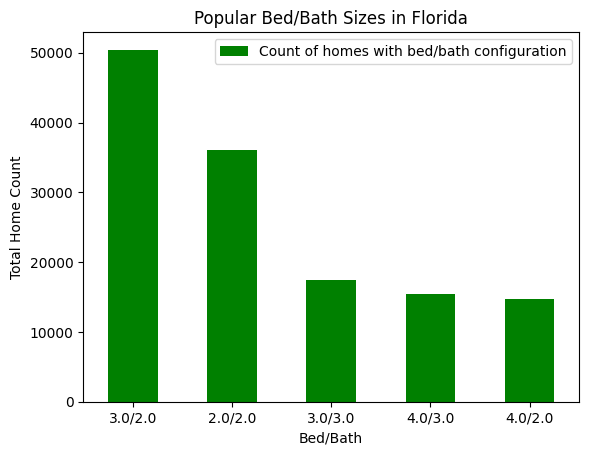

In [ ]:
q2.plot(kind='bar',x='bed/bath',y='count', title='Popular Bed/Bath Sizes in '+ state_select, color = 'green')
plt.xlabel('Bed/Bath')
plt.ylabel('Total Home Count')
plt.legend(['Count of homes with bed/bath configuration'])
plt.xticks(rotation=0) # ticks were rotated by deafult, required zeroing out
plt.show()

###**Question 3: What year had the highest value of home sales in selected state w/ graphical display**

In [ ]:
df_f2.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
303557,for_sale,1500000.0,NaN,NaN,16.50,Malabar,Florida,32950.0,NaN,NaN
350960,for_sale,436000.0,NaN,NaN,4.73,NaN,Florida,99999.0,NaN,NaN
354796,for_sale,349000.0,NaN,NaN,1.33,Palm Bay,Florida,32905.0,NaN,NaN
360451,for_sale,100000.0,NaN,NaN,NaN,Out of State,Florida,NaN,NaN,NaN
409454,for_sale,52000.0,NaN,NaN,NaN,Out of State,Florida,NaN,NaN,NaN


In [ ]:
q3 = df_f2#[df_filter['status']=='sold'] decided not to filter by sold becuase it limits results to 2 years.
q3.dropna(subset=['prev_sold_date','price'],inplace=True)
q3.head()

<ipython-input-133-29f0f4fa6aa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3.dropna(subset=['prev_sold_date','price'],inplace=True)


,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
413532,for_sale,275000.0,6.0,4.0,NaN,Hilliard,Florida,32046.0,2368.0,1989-06-19
413549,for_sale,285000.0,3.0,2.0,0.26,Yulee,Florida,32097.0,1635.0,2014-01-24
413553,for_sale,340000.0,3.0,2.0,0.17,Yulee,Florida,32097.0,1503.0,2017-12-05
413555,for_sale,429900.0,3.0,2.0,0.19,Yulee,Florida,32097.0,2233.0,2002-03-25
413556,for_sale,699000.0,3.0,3.0,0.23,Fernandina Beach,Florida,32034.0,1406.0,2020-11-19


In [ ]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193410 entries, 413532 to 1759371
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          193410 non-null  object 
 1   price           193410 non-null  float64
 2   bed             153215 non-null  float64
 3   bath            153971 non-null  float64
 4   acre_lot        148222 non-null  float64
 5   city            193289 non-null  object 
 6   state           193410 non-null  object 
 7   zip_code        193410 non-null  float64
 8   house_size      153508 non-null  float64
 9   prev_sold_date  193410 non-null  object 
dtypes: float64(6), object(4)
memory usage: 16.2+ MB


In [ ]:
#Converting sold date into the correct format
q3['prev_sold_date']=pd.to_datetime(q3['prev_sold_date'])

<ipython-input-135-607bbed572b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['prev_sold_date']=pd.to_datetime(q3['prev_sold_date'])


In [ ]:
#Pulling the year from the sold date
q3['sold_year']=q3['prev_sold_date'].dt.year
q3.head()

<ipython-input-136-87ef3760b98d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['sold_year']=q3['prev_sold_date'].dt.year


,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,sold_year
413532,for_sale,275000.0,6.0,4.0,NaN,Hilliard,Florida,32046.0,2368.0,1989-06-19,1989
413549,for_sale,285000.0,3.0,2.0,0.26,Yulee,Florida,32097.0,1635.0,2014-01-24,2014
413553,for_sale,340000.0,3.0,2.0,0.17,Yulee,Florida,32097.0,1503.0,2017-12-05,2017
413555,for_sale,429900.0,3.0,2.0,0.19,Yulee,Florida,32097.0,2233.0,2002-03-25,2002
413556,for_sale,699000.0,3.0,3.0,0.23,Fernandina Beach,Florida,32034.0,1406.0,2020-11-19,2020


In [ ]:
statsq3=q3.groupby('sold_year')['price'].sum().reset_index()
statsq3['price']=statsq3['price'].round(2)
q3_top=statsq3.sort_values(by='price', ascending=False).head(10) # picking the top 10 most lucrative years and sorting them by price to put into a new variable
q3_top.rename({'price':'Total Sales'},axis=1,inplace=True)
q3_top

,sold_year,Total Sales
60,2022,2.902424e+10
59,2021,1.790337e+10
58,2020,5.841772e+09
57,2019,5.176251e+09
56,2018,5.088129e+09
55,2017,3.946477e+09
53,2015,3.533456e+09
54,2016,3.178158e+09
52,2014,2.746087e+09
51,2013,2.623423e+09


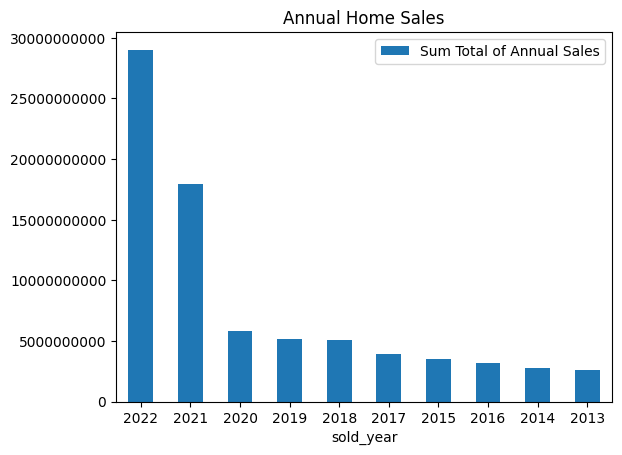

In [ ]:
q3_top.plot(kind='bar', x='sold_year', y='Total Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(['Sum Total of Annual Sales'])
plt.title('Annual Home Sales')
plt.show()

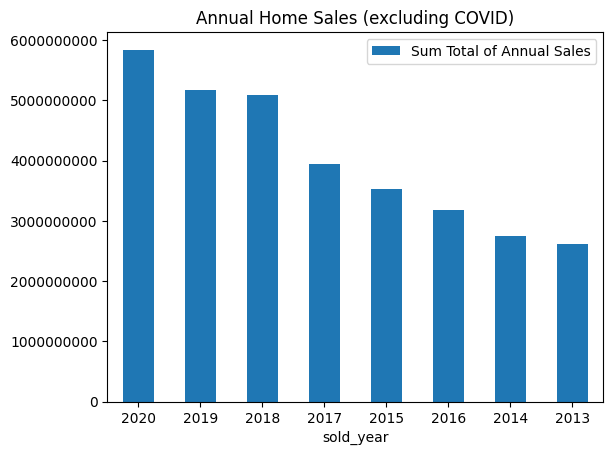

In [ ]:
# For fun lets exclude 2022 and 2021 becasue of the massive Covid increase
q3_covid=q3_top[2:] # excluding covid years
q3_covid.plot(kind='bar', x='sold_year', y='Total Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Annual Home Sales (excluding COVID)')
plt.legend(['Sum Total of Annual Sales'])
plt.show()


### **Question 4 :What state sold the highest number of homes**

In [ ]:
q4=df.copy()
#Have to reclean data that is unfiltered by state
q4.dropna(subset=['price'],inplace=True)
q4.drop_duplicates(inplace=True)
q4.drop(['street','brokered_by'], axis=1, inplace=True)
#q4.info()
#q4.isnull().sum()
q4.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
q4_sold=q4[q4['status']=='sold']
#q4_sold.head()
q4_sold['count']=''
q4_f=q4_sold.groupby('state').count().reset_index()
q4_f=q4_f[['state','count']]
q4_f.head(10)

<ipython-input-157-95b1721c29c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_sold['count']=''


,state,count
0,Alabama,6765
1,Arizona,34126
2,Arkansas,4024
3,California,125013
4,Colorado,4676
5,Connecticut,64
6,Delaware,3287
7,District of Columbia,3703
8,Florida,85592
9,Georgia,28943


In [ ]:
q4_f=q4_f.sort_values(by='count', ascending=False).reset_index() #Ordering the number of sold homes per state from highest to lowest
q4_f.drop('index', axis=1, inplace=True) #resetting the index creates an index column
q4_f.head()

,state,count
0,California,125013
1,Florida,85592
2,Texas,80548
3,Washington,36923
4,Arizona,34126


In [ ]:
print("The state with the highest number of sold homes is {} with an impressive number of homes sold at {}.".format(q4_f['state'][0],q4_f['count'][0]))

The state with the highest number of sold homes is California with an impressive number of homes sold at 125013.


In [ ]:
# Alternative method to create a series containing just the top value
#loc gets rows (and/or columns) with particular labels.
#iloc gets rows (and/or columns) at integer locations
q4_f2=q4_f.iloc[0] #Pulling row containing the state with highest count of sold homes

In [ ]:
print("The state with the highest number of sold homes is {} with an impressive number of homes sold at {}.".format(q4_f2[0],q4_f2[1]))

The state with the highest number of sold homes is California with an impressive number of homes sold at 125013.


<ipython-input-161-f0966adf5ccc>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The state with the highest number of sold homes is {} with an impressive number of homes sold at {}.".format(q4_f2[0],q4_f2[1]))


### **Question 5 What state has the highest number of active listings.**




In [ ]:
q5=df.copy()
q5.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
q5_sale =q5[q5['status']=='for_sale'] # filtering for only active listings
q5_sale['status'].value_counts() #Check for values in status

,count
status,
for_sale,1389306


In [ ]:
q5_f=q5_sale.groupby('state').count().reset_index()
q5_f=q5_f[['state','status']]
q5_f.rename({'status':'Active Listing Count'}, axis=1, inplace=True)
q5_f=q5_f.sort_values(by='Active Listing Count', ascending=False).reset_index()
q5_f.drop('index', axis=1, inplace=True)
q5_f.head()


,state,Active Listing Count
0,Florida,161216
1,Texas,122172
2,California,101034
3,New York,71378
4,North Carolina,57129


In [ ]:
print("The state with the highest number of active listings is {} with an impressive number of active listings at {}.".format(q5_f['state'][0],q5_f['Active Listing Count'][0]))

The state with the highest number of active listings is Florida with an impressive number of active listings at 161216.


###**Machine Learning Model: Simple Linear Regression**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mldf=df_f2.copy() #machine learning df

In [ ]:
mldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249418 entries, 303557 to 1759371
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          249418 non-null  object 
 1   price           249418 non-null  float64
 2   bed             188881 non-null  float64
 3   bath            187233 non-null  float64
 4   acre_lot        186505 non-null  float64
 5   city            249044 non-null  object 
 6   state           249418 non-null  object 
 7   zip_code        249395 non-null  float64
 8   house_size      188275 non-null  float64
 9   prev_sold_date  193410 non-null  object 
dtypes: float64(6), object(4)
memory usage: 20.9+ MB


In [ ]:
mldf.dropna(subset=['house_size','bed','bath','acre_lot','zip_code','price','city'],inplace=True) # Relavant data to be used for analysis

In [ ]:
mldf.isnull().sum()

,0
status,0
price,0
bed,0
bath,0
acre_lot,0
city,0
state,0
zip_code,0
house_size,0
prev_sold_date,18385


In [ ]:
mldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127658 entries, 413549 to 1759366
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          127658 non-null  object 
 1   price           127658 non-null  float64
 2   bed             127658 non-null  float64
 3   bath            127658 non-null  float64
 4   acre_lot        127658 non-null  float64
 5   city            127658 non-null  object 
 6   state           127658 non-null  object 
 7   zip_code        127658 non-null  float64
 8   house_size      127658 non-null  float64
 9   prev_sold_date  109273 non-null  object 
dtypes: float64(6), object(4)
memory usage: 10.7+ MB


In [ ]:
mldf.head(3)

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
413549,for_sale,285000.0,3.0,2.0,0.26,Yulee,Florida,32097.0,1635.0,2014-01-24
413553,for_sale,340000.0,3.0,2.0,0.17,Yulee,Florida,32097.0,1503.0,2017-12-05
413554,for_sale,649000.0,3.0,1.0,0.59,Fernandina Beach,Florida,32034.0,1896.0,NaN


In [ ]:
#Encoding catergorical data
# One hot encoding vs label encoding https://www.statology.org/label-encoding-vs-one-hot-encoding/
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
mldf['city']=le.fit_transform(mldf['city']) #assigns a numerical value to a categorical one so that it can be analyzed

#alternative method: mldf[['city']]=mldf[['city']].apply(LabelEncoder().fit_transform)
# if multiple columns need conversion #mldf[['city','zip_code']]=mldf[['city','zip_code']].apply(LabelEncoder().fit_transform)

In [ ]:
X= mldf[['bed','bath','house_size','city']] # Assigning independent variables which will be used to determine the price
y= mldf['price'] # assigning dependent variable or target which I am trying to predict

In [ ]:
mldf['city'].value_counts()
mldf.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
413549,for_sale,285000.0,3.0,2.0,0.26,650,Florida,32097.0,1635.0,2014-01-24
413553,for_sale,340000.0,3.0,2.0,0.17,650,Florida,32097.0,1503.0,2017-12-05
413554,for_sale,649000.0,3.0,1.0,0.59,174,Florida,32034.0,1896.0,NaN
413555,for_sale,429900.0,3.0,2.0,0.19,650,Florida,32097.0,2233.0,2002-03-25
413556,for_sale,699000.0,3.0,3.0,0.23,174,Florida,32034.0,1406.0,2020-11-19


In [ ]:
mldf.drop(['status','prev_sold_date','state'], axis=1, inplace=True) #Dropping irrelevant and nonnumeric columns.

<Axes: >

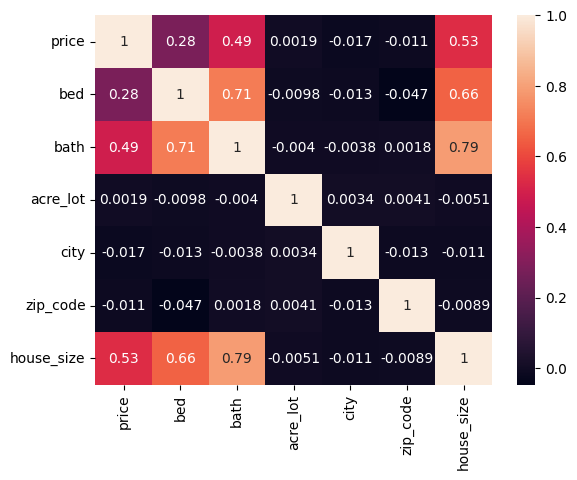

In [ ]:
sns.heatmap(mldf.corr(), annot=True) #Shows correlation between categories, annot displays values in blocks

In [ ]:
print(X.shape) #how many total rows, columns we have
print(y.shape)

(127658, 4)
(127658,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Assigning training and testing splits to the dataset. 80% will be used for training, 20% for testing
#random state is the seed value. i.e the value a random generator will use as a baseline so that results can be duplicated.
#Essentially makes it so you use the same data each time you run the code.
#If no random state is assigned different portions of the dataset will be used each time resulting in different end results


In [ ]:
print(X_train.shape) #how many rows are used to train the data ex: 60% (test_size=.4(40%) for testing). 816376/1360627 =60%
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(102126, 4)
(102126,)
(25532, 4)
(25532,)


In [ ]:
lm = LinearRegression() # used to fit linear regression model
lm.fit(X_train,y_train) #Training the model with the data. Must ensure there are no NaN/Null values

LinearRegression()

In [ ]:
predict=lm.predict(X_test) #creating a prediction array for houseing prices

In [ ]:
#Can test various situations for preditction by inputting different values
#lm.predict((['bed','bath','house_size','city']))
lm.predict(([3,2,1000,650],[5,3,1500,650],[10,5,3000,650]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-127939.54679191,  -49093.14420585,  103457.49397589])

In [ ]:
predict

array([ 244876.05878282, 2819581.78238668,  946918.46180863, ...,
        437052.57359654,  441258.47654607,  -25405.9665247 ])

In [ ]:
lm.score(X_test,y_test) # Checks the accuracy of the model as a percentage .34= 34%. Better case >80%

0.3162182355123425

In [ ]:
from sklearn.metrics import r2_score # Another way to check the accuracy
r2_score(y_test,predict)
# y intecept lm.intercept_
# coefficient lm.coef_

0.3162182355123425

Based on the score this model is not very accurate at about 31% accuracy. To gain more clarity we'll graph the model



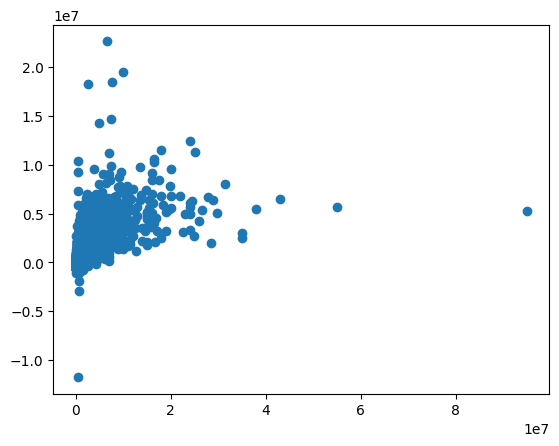

In [ ]:
plt.scatter(y_test, predict) # Comparing the prediction array to the actual vaules from y_test
#plt.plot(y_test, predict, color='red')

We can see that there are some outliers in the data.

In [ ]:
#ldf_head=mldf.drop(['state','status','city','prev_sold_date'], axis=1) #dropping all str/objects from .info() to create heatmap showing correlation
#sns.heatmap(mldf_head.corr(), annot=True)

In [ ]:
mldf2=mldf.copy() #Copying the data to a new dataframe for futher filtering and analysis

In [ ]:
#looking for obvious outliers in the dependent variables. We're looking at residential so anthing over  7 bed/bath at the most is excessive
print(mldf2['bed'].value_counts().sort_index(ascending=True))
print(mldf2['bath'].value_counts().sort_index(ascending=True))

bed
1.0       2450
2.0      23704
3.0      58767
4.0      31838
5.0       7880
6.0       1937
7.0        443
8.0        348
9.0        113
10.0        55
11.0        24
12.0        38
13.0         7
14.0        10
15.0         6
16.0        10
17.0         3
18.0         1
19.0         1
20.0         3
22.0         1
24.0         3
27.0         3
30.0         2
32.0         3
36.0         2
38.0         1
42.0         1
62.0         1
72.0         1
73.0         1
100.0        1
Name: count, dtype: int64
bath
1.0     10589
2.0     71939
3.0     29937
4.0      8940
5.0      3257
6.0      1401
7.0       774
8.0       379
9.0       192
10.0       88
11.0       57
12.0       28
13.0       24
14.0       15
15.0       12
16.0        6
17.0        1
18.0        2
19.0        2
20.0        2
21.0        3
22.0        1
23.0        1
24.0        1
25.0        1
26.0        1
30.0        1
44.0        1
56.0        1
69.0        1
70.0        1
Name: count, dtype: int64


In [ ]:
#Trying to imporve accuracy by removing outliers
mldf2=mldf2[mldf2['bath']<=7]
mldf2=mldf2[mldf2['bed']<=7]
mldf2['bed'].value_counts()

,count
bed,
3.0,58766
4.0,31825
2.0,23704
5.0,7759
1.0,2449
6.0,1718
7.0,305


In [ ]:
mldf2['house_size'].value_counts().nlargest(10) #pulling top 10 largest values

,count
house_size,
1828.0,715
1200.0,467
960.0,463
1152.0,442
1672.0,363
1500.0,353
1056.0,335
1248.0,332
864.0,330


In [ ]:
mldf2['city'].value_counts().nlargest(10) #Top 10 most common cities by code

,count
city,
443,6263
582,5017
374,3300
291,2865
428,2715
529,2639
80,2471
402,2467
472,2054


In [ ]:
mldf2['zip_code'].value_counts().nlargest(10) #Top 10 most common zip codes

,count
zip_code,
34747.0,978
34746.0,874
34787.0,804
32909.0,781
33837.0,766
33993.0,664
33844.0,608
33573.0,599
34759.0,586


#Correct the mode() not pulling the most repeated : Currently working as on 8/29/24 12:08

In [ ]:
#Prompting user to inpt specific zipcode they are interested in or will default to the zipcode with the most data
user_zipselect = input("Is there a specific zipcode you would like to anaylze? (Y/N): ")
if (user_zipselect in ['Y','y']):
  zipselect =int(input("Which zipcode would you like to analyze: "))  # Changing type of input to int or float
  while zipselect not in mldf2['zip_code'].values:  #Alt:  while zipselect not in mldf2['zip_code'].unique()
    print("The zipcode you selected is invalid. Please check spelling and try again.")
    zipselect = int(input("Which zipcode would you like to analyze: "))
  else:
    print('The zipcode you selected is {}'.format(zipselect))
    pass;

elif (user_zipselect== 'N') or (user_zipselect=='n'):
  zipselect= int(mldf2['zip_code'].mode()[0])
  print('The zipcode with the most data will be used which is {}'.format(zipselect))
else:
  print('Please enter a valid input')
  pass

Is there a specific zipcode you would like to anaylze? (Y/N): n
The zipcode with the most data will be used which is 34747


In [ ]:
#Imporving accurracy by limiting search to specific city or zip code
#mldf2=mldf2[mldf2['city']=='Jacksonville']
#mldf2=mldf2[mldf2['zip_code']==mldf2['zip_code'].mode()[0]]
mldf2=mldf2[mldf2['zip_code']==zipselect]

In [ ]:
#Clearing any nulls
mldf2.dropna(subset=['price','house_size','bed','bath','acre_lot'],inplace=True)
mldf2.reset_index(inplace=True)
mldf2.isnull().sum()

,0
index,0
price,0
bed,0
bath,0
acre_lot,0
city,0
zip_code,0
house_size,0


In [ ]:
x2= mldf2[['bed','bath','acre_lot','house_size']]
y2=mldf2['price']

In [ ]:
mldf2.head()

,index,price,bed,bath,acre_lot,city,zip_code,house_size
0,466408,316500.0,3.0,2.0,0.15,291,34747.0,1682.0
1,466417,335000.0,4.0,2.0,0.31,291,34747.0,1377.0
2,466422,389900.0,3.0,3.0,0.22,509,34747.0,1630.0
3,466425,1300000.0,5.0,6.0,0.11,509,34747.0,3326.0
4,466428,520000.0,5.0,5.0,0.06,291,34747.0,2263.0


In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [ ]:
lm2 = LinearRegression()
lm2.fit(x2_train,y2_train)

LinearRegression()

In [ ]:
from matplotlib import pyplot as plt
print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(782, 4)
(782,)
(196, 4)
(196,)


In [ ]:
predict2=lm2.predict(x2_test)

In [ ]:
r2_score(y2_test,predict2)

0.8000726157644453

Model accuracy has greatly imporved for this specific zipcode.

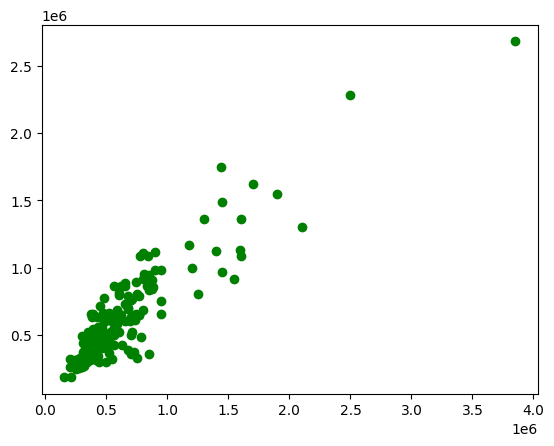

In [ ]:
plt.scatter(y2_test, predict2, color ='green')
#plt.plot(y2_test, predict, color='red')

In [ ]:
#I wanted create a df to compare the predicted values and the actual values with the corresponding features
#print(predict2) # very long array
print(x2_test)
superframe=x2_test.copy()
superframe['predictions']=predict2
superframe['actual_values']=y2_test
superframe['averages']=superframe['predictions']/superframe['actual_values'] # additional check for accurary for each instance
superframe2=superframe.reset_index(drop=True)
superframe2

     bed  bath  acre_lot  house_size
199  3.0   2.0      0.15      1860.0
543  4.0   4.0      0.16      1824.0
174  6.0   6.0      0.14      2831.0
928  3.0   3.0      0.01      1590.0
66   4.0   2.0      0.14      1600.0
..   ...   ...       ...         ...
361  5.0   3.0      0.20      2891.0
883  4.0   3.0      0.07      1636.0
525  6.0   6.0      0.27      2936.0
971  6.0   6.0      0.29      3188.0
972  6.0   5.0      0.11      3228.0

[196 rows x 4 columns]


,bed,bath,acre_lot,house_size,predictions,actual_values,averages
0,3.0,2.0,0.15,1860.0,524055.031668,710000.0,0.738106
1,4.0,4.0,0.16,1824.0,401094.850315,499000.0,0.803797
2,6.0,6.0,0.14,2831.0,648590.083909,765000.0,0.847830
3,3.0,3.0,0.01,1590.0,395827.803982,322000.0,1.229279
4,4.0,2.0,0.14,1600.0,312304.640574,365500.0,0.854459
...,...,...,...,...,...,...,...
191,5.0,3.0,0.20,2891.0,788942.908191,765000.0,1.031298
192,4.0,3.0,0.07,1636.0,321732.614383,333000.0,0.966164
193,6.0,6.0,0.27,2936.0,697141.981724,680000.0,1.025209
194,6.0,6.0,0.29,3188.0,810037.159490,599900.0,1.350287


In [ ]:
# looking at a specific row values. 1042 is very close to 100% accuracy
#superframe.loc[index#]

##Note to self by minimzing the dataset to certain zipcodes or citites the models accuracy greatly imporves. It could mean throughout the entire state or even in certain cities there are to many outliners or variance in range of prices. Best results are by zipcode. When comparaing Miami to Jacksonville, jacksonville model has better accracry.

In [ ]:
comp=[]
for rows in superframe2.itertuples():
  comp.append(f"{rows.bed}/{rows.bath}")
superframe2['bed/bath']=pd.DataFrame(comp)

superframe2.head()

,bed,bath,acre_lot,house_size,predictions,actual_values,averages,bed/bath
0,3.0,2.0,0.15,1860.0,524055.031668,710000.0,0.738106,3.0/2.0
1,4.0,4.0,0.16,1824.0,401094.850315,499000.0,0.803797,4.0/4.0
2,6.0,6.0,0.14,2831.0,648590.083909,765000.0,0.847830,6.0/6.0
3,3.0,3.0,0.01,1590.0,395827.803982,322000.0,1.229279,3.0/3.0
4,4.0,2.0,0.14,1600.0,312304.640574,365500.0,0.854459,4.0/2.0


<ipython-input-360-b0683905708a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(y='predictions', x='bed/bath', data=superframe2, label='predicts',ci=None)
<ipython-input-360-b0683905708a>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y='actual_values', x='bed/bath', data=superframe2, label='actual', ci=None)


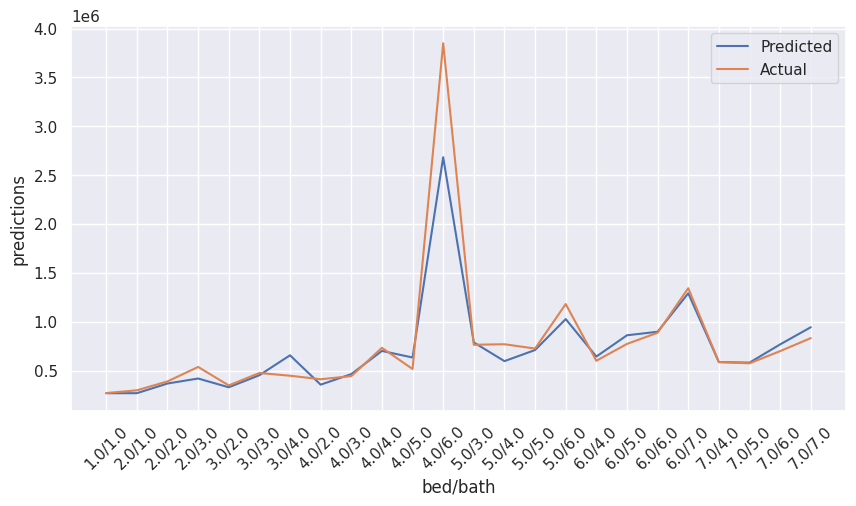

In [ ]:
import seaborn as sns
superframe2['bed/bath'] = superframe2['bed/bath'].astype('category')
ax=sns.lineplot(y='predictions', x='bed/bath', data=superframe2, label='predicts',ci=None) # ci is confidence interval
sns.lineplot(y='actual_values', x='bed/bath', data=superframe2, label='actual', ci=None)
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4
ax.tick_params(axis='x', labelrotation=45)
ax.legend(['Predicted','Actual'])

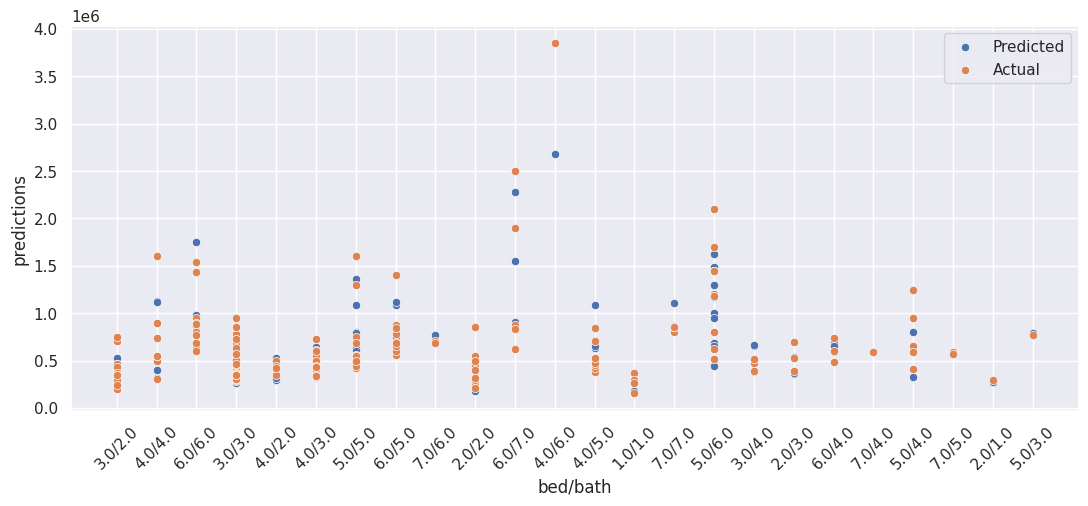

In [ ]:
ax=sns.scatterplot(y='predictions', x='bed/bath', data=superframe2)
sns.scatterplot(y='actual_values', x='bed/bath', data=superframe2)
sns.set(rc={"figure.figsize":(13, 5)}) #width=8, height=4
ax.tick_params(axis='x', labelrotation=45)
ax.legend(['Predicted','Actual'])